<a href="https://colab.research.google.com/github/cavalcantetreinamentos/titanic_data_science/blob/main/Curso_Pandas_e_SKLearn_Unilasalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma abordadem prática em Data Science
- Utilizando o Dataset com dados do Titanic

### Importação das bibliotecas utilizadas

In [32]:
# Biblioteca para programação matemática
import numpy as np

# Biblioteca para manipulação de dados
import pandas as pd

# Biblioteca com funções estatísticas ciêntificos
import scipy.stats as stats

# Bibliotecas para construção de gráficos
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Visualizar a árvore de decisão
import graphviz

# Plotar os gráficos no ambiente sendo utilizado
%matplotlib inline

# Mostrar todas colunas 
pd.pandas.set_option("display.max_columns", None)

In [33]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.tree import export_graphviz

### Verificando versões das bibliotecas que estão sendo utilizadas

In [34]:
# Versão do Python
from platform import python_version
print("Python Version:", python_version())

# Versão do Numpy e Pandas
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)

# Versão do Scipy
import scipy
print("Scipy Version:", scipy.__version__)

# Versão do matplotlib e seaborn
import matplotlib
print("matplotlib Version:", matplotlib.__version__)
print("Seaborn Version:", sns.__version__)



Python Version: 3.7.15
Numpy Version: 1.21.6
Pandas Version: 1.3.5
Scipy Version: 1.7.3
matplotlib Version: 3.2.2
Seaborn Version: 0.11.2


### Lendo o DataFrame do Titanic

In [35]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/cavalcantetreinamentos/titanic_data_science/main/titanic.csv")

### Explorando os dados

---
### Dicionário de Dados (Dataframe Titanic)
- passengerid = ID do passageiro do navio (código primário).
- survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.  
- pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.  
- name = Nome do passageiro  
- sex = Gênero do passageiro, sendo masculino e feminino.  
- age = Idade do passageiro na data da ocorrência do naufrágio.  
- sibsp = Número de irmãos / cônjuges a bordo.  
- parch = Número de pais / filhos a bordo.  
- ticket = Código do ticket.  
- fare = Valor da passagem.  
- cabin = Código de identificação da Cabine.  
- embarked = Porto onde o passageiro embarcou no navio. (C = Cherbourg; Q = Queenstown; S = Southampton)  

---

In [36]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
print(df_titanic.shape)

(891, 12)


In [38]:
print(df_titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [39]:
print(df_titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [40]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

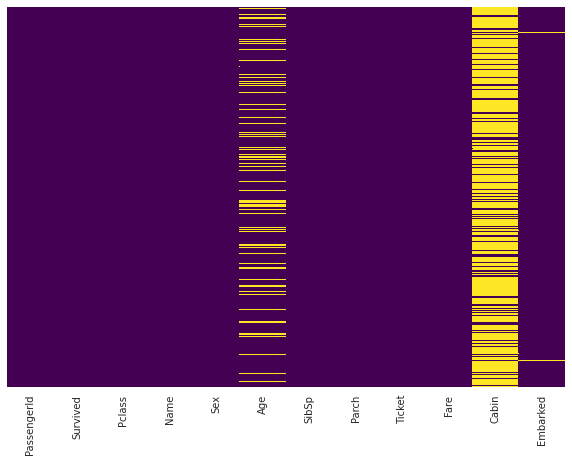

In [42]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [43]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df_titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


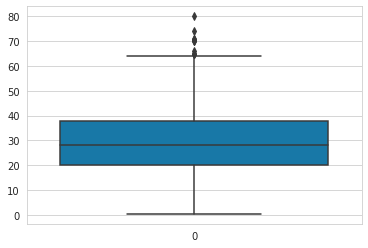

In [45]:
sns.boxplot(data=df_titanic["Age"], palette='winter')

In [46]:
iqr = df_titanic["Fare"].quantile(q=0.75) - df_titanic["Fare"].quantile(q=0.25)
print("IQR:", iqr)
LI = df_titanic["Fare"].quantile(q=0.25) - 1.5 * iqr
LS = df_titanic["Fare"].quantile(q=0.75) + 1.5 * iqr
print("LI:", LI)
print("LS:", LS)

IQR: 23.0896
LI: -26.724
LS: 65.6344


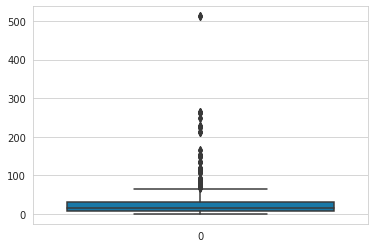

In [47]:
sns.boxplot(data=df_titanic["Fare"], palette='winter')

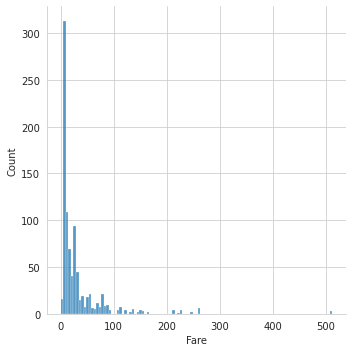

In [48]:
sns.displot(data=df_titanic["Fare"])

In [49]:
df_titanic["Fare"].quantile(q=0.99)

249.00622000000035

In [50]:
df_titanic[df_titanic["Fare"] >= 249]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [51]:
# Criando dataframe onde será processado os dados
df_titanic_proc = pd.DataFrame()

---

### Análise das Variáveis/Features

2
[0 1]
0


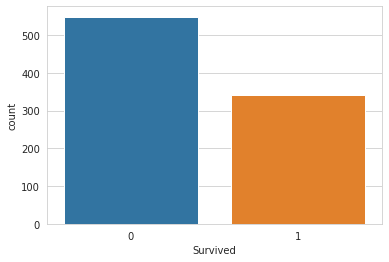

In [52]:
# Survived
print(df_titanic["Survived"].nunique())
print(df_titanic["Survived"].unique())
print(df_titanic["Survived"].isnull().sum())
sns.countplot(data = df_titanic, x = "Survived")

In [53]:
# Criando uma função para facilitar a análise

def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived') # Gráfico de Barra
    else:
        sns.displot(data[column], kde = True) # Histograma
    

### Survived

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    549
1    342
Name: Survived, dtype: int64


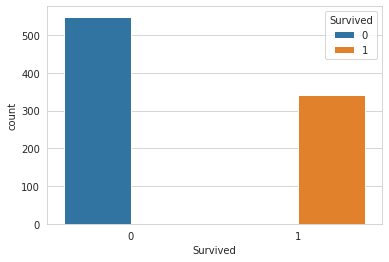

In [54]:
titanic_func(df_titanic, "Survived")

In [55]:
# Adicionando a coluna Survived ao novo Dataframe
df_titanic_proc["Survived"] = df_titanic["Survived"]
df_titanic_proc

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### Pclass

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
3    491
1    216
2    184
Name: Pclass, dtype: int64


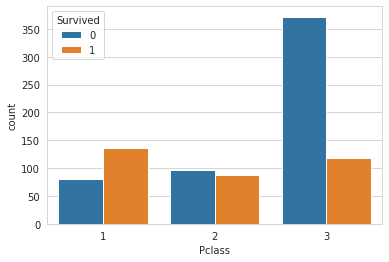

In [56]:
# Pclass
titanic_func(df_titanic, "Pclass")

In [57]:
df_titanic_proc["Pclass"] = df_titanic["Pclass"]
df_titanic_proc.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


### Sex

Quantidade de valores únicos: 2

Quais são os valores únicos: ['male' 'female']

Quantidade de valores nulos: 0

Quantidade por opção: 
male      577
female    314
Name: Sex, dtype: int64


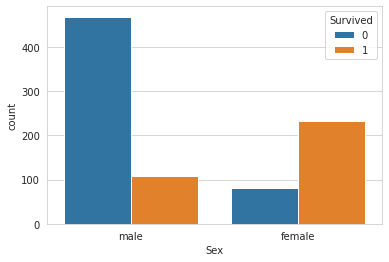

In [58]:
# Sex
titanic_func(df_titanic, 'Sex')

In [59]:
df_titanic['Sex'] = df_titanic['Sex'].replace(['female', 'male'], [1, 0])
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    577
1    314
Name: Sex, dtype: int64


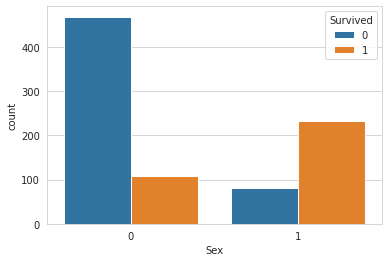

In [60]:
titanic_func(df_titanic, 'Sex')

In [61]:
df_titanic_proc["Sex"] = df_titanic["Sex"]

Quantidade de valores únicos: 88

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Quantidade de valores nulos: 177

Quantidade por opção: 
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


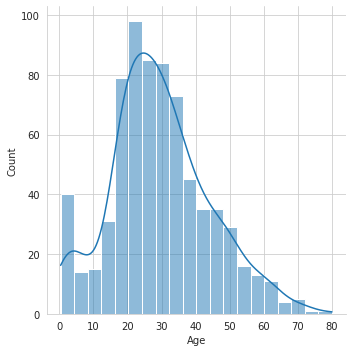

In [62]:
# Age
titanic_func(df_titanic, 'Age', False)

In [63]:
df_titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


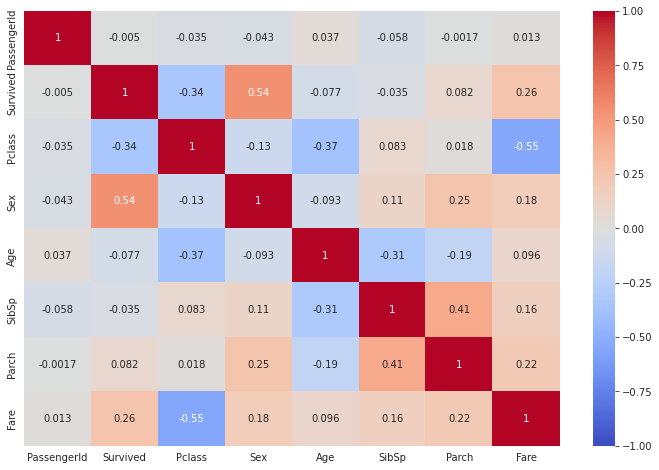

In [64]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_titanic.corr(), 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            annot=True)

In [65]:
print(df_titanic[df_titanic['Pclass'] == 1]['Age'].mean())
print(df_titanic[df_titanic['Pclass'] == 2]['Age'].mean())
print(df_titanic[df_titanic['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [66]:
for i in sorted(df_titanic['Pclass'].unique()):
    print(f"Pessoas da {i}ª classe tem a média de idade de: {df_titanic[df_titanic['Pclass'] == i]['Age'].mean():.0f} anos.")

Pessoas da 1ª classe tem a média de idade de: 38 anos.
Pessoas da 2ª classe tem a média de idade de: 30 anos.
Pessoas da 3ª classe tem a média de idade de: 25 anos.


In [67]:
df_titanic[df_titanic['Pclass'] == 1]['Age'].isnull().sum()

30

In [68]:
df_titanic['Age'].isnull().sum()

177

In [69]:
df_titanic.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [70]:
df_titanic[df_titanic['Pclass'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S


In [71]:
count = 0
for i in df_titanic.index:   
    if pd.isnull(df_titanic['Age'][i]):
        
        if df_titanic['Pclass'][i] == 1:
            df_titanic['Age'][i] = round(df_titanic[df_titanic['Pclass'] == 1]['Age'].mean(), 0)
            
        elif df_titanic['Pclass'][i] == 2:
            df_titanic['Age'][i] = round(df_titanic[df_titanic['Pclass'] == 2]['Age'].mean(), 0)
            
        elif df_titanic['Pclass'][i] == 3:
            df_titanic['Age'][i] = round(df_titanic[df_titanic['Pclass'] == 3]['Age'].mean(), 0)
            
    else:
        continue


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [73]:
df_titanic[df_titanic['Pclass'] == 1]['Age'].isnull().sum()

0

In [74]:
df_titanic_proc["Age"] = df_titanic["Age"]

In [75]:
df_titanic_proc

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
886,0,2,0,27.0
887,1,1,1,19.0
888,0,3,1,25.0
889,1,1,0,26.0


### SibSp

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


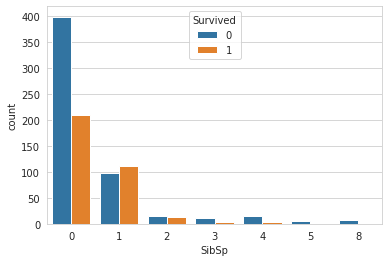

In [76]:
# SibSp
titanic_func(df_titanic, 'SibSp')

In [77]:
df_titanic_proc['SibSp'] = df_titanic['SibSp']
df_titanic_proc.tail()

,Survived,Pclass,Sex,Age,SibSp
886,0,2,0,27.0,0
887,1,1,1,19.0,0
888,0,3,1,25.0,1
889,1,1,0,26.0,0
890,0,3,0,32.0,0


### Parch

Quantidade de valores únicos: 7

Quais são os valores únicos: [0 1 2 5 3 4 6]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


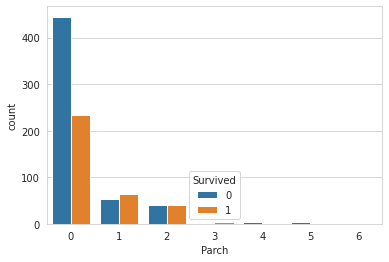

In [78]:
# Parch
titanic_func(df_titanic, 'Parch')

In [79]:
df_titanic_proc['Parch'] = df_titanic['Parch']
df_titanic_proc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


### Criando nova coluna - FamilySize

In [80]:
# Criando nova coluna - Tamanho da família
df_titanic_proc['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1 
df_titanic_proc.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0,3,0,22.0,1,0,2
1,1,1,1,38.0,1,0,2
2,1,3,1,26.0,0,0,1
3,1,1,1,35.0,1,0,2
4,0,3,0,35.0,0,0,1
5,0,3,0,25.0,0,0,1
6,0,1,0,54.0,0,0,1
7,0,3,0,2.0,3,1,5
8,1,3,1,27.0,0,2,3
9,1,2,1,14.0,1,0,2


### Fare

Quantidade de valores únicos: 248

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

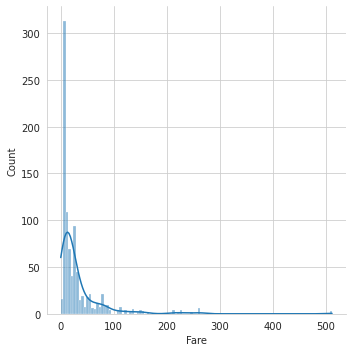

In [81]:
# Fare
titanic_func(df_titanic, 'Fare', False)

In [82]:
df_titanic[df_titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [83]:
df_titanic_proc["Fare"] = df_titanic["Fare"]

### Cabin

Quantidade de valores únicos: 147

Quais são os valores únicos: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 

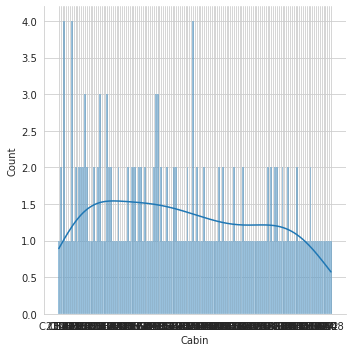

In [84]:
# Cabin
titanic_func(df_titanic, 'Cabin', False)

### Embarked

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


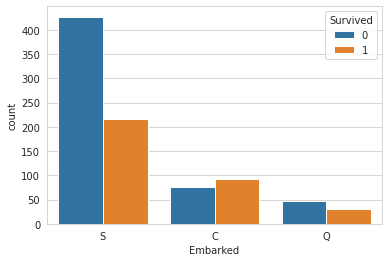

In [85]:
# Embarked
titanic_func(df_titanic, 'Embarked')

In [86]:
print(df_titanic[df_titanic['Embarked'] == "S"]['Survived'].mean())
print(df_titanic[df_titanic['Embarked'] == "S"]['Pclass'].mean())

0.33695652173913043
2.3509316770186337


In [87]:
print(df_titanic[df_titanic['Embarked'] == "C"]['Survived'].mean())
print(df_titanic[df_titanic['Embarked'] == "C"]['Pclass'].mean())

0.5535714285714286
1.8869047619047619


In [88]:
print(df_titanic[df_titanic['Embarked'] == "Q"]['Survived'].mean())
print(df_titanic[df_titanic['Embarked'] == "Q"]['Pclass'].mean())

0.38961038961038963
2.909090909090909


In [89]:
df_titanic[df_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [90]:
df_titanic['Embarked'].fillna('C', inplace = True)

In [91]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [92]:
df_titanic_proc['Embarked'] = df_titanic['Embarked']
print(df_titanic_proc.head())

   Survived  Pclass  Sex   Age  SibSp  Parch  FamilySize     Fare Embarked
0         0       3    0  22.0      1      0           2   7.2500        S
1         1       1    1  38.0      1      0           2  71.2833        C
2         1       3    1  26.0      0      0           1   7.9250        S
3         1       1    1  35.0      1      0           2  53.1000        S
4         0       3    0  35.0      0      0           1   8.0500        S


### Name

In [93]:
# Name
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [94]:
df_titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [95]:
df_titanic['Title'] = df_titanic['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [96]:
df_titanic['Title'].nunique()

17

In [97]:
df_titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [98]:
df_titanic['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [99]:
df_titanic['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in df_titanic['Title']]

In [100]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,Person
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,Mr


Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opção: 
Mr        517
Miss      182
Mrs       125
Master     40
Person     27
Name: Title, dtype: int64


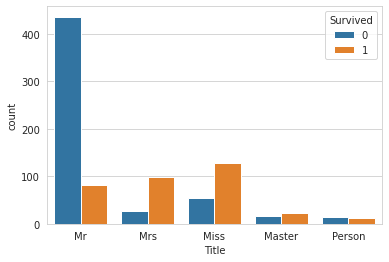

In [101]:
titanic_func(df_titanic, 'Title')

In [102]:
df_titanic_proc['Title'] = df_titanic['Title']
df_titanic_proc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1,3,1,26.0,0,0,1,7.9250,S,Miss
3,1,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0,3,0,35.0,0,0,1,8.0500,S,Mr


In [103]:
### Criando variáveis dummies a partir das variavéis categóricas

pclass = pd.get_dummies(df_titanic_proc['Pclass'], prefix = "Pclass", drop_first = True)
title = pd.get_dummies(df_titanic_proc['Title'], prefix = 'Title', drop_first = True)
embarked = pd.get_dummies(df_titanic_proc['Embarked'], prefix = 'Embarked', drop_first = True)

In [104]:
pclass

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [105]:
title

,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
886,0,0,0,1
887,1,0,0,0
888,1,0,0,0
889,0,1,0,0


In [106]:
embarked

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [107]:
df_titanic_proc_full = pd.concat([df_titanic_proc, pclass, title, embarked], axis = 1)

In [108]:
df_titanic_proc_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,2,7.2500,S,Mr,0,1,0,1,0,0,0,1
1,1,1,1,38.0,1,0,2,71.2833,C,Mrs,0,0,0,0,1,0,0,0
2,1,3,1,26.0,0,0,1,7.9250,S,Miss,0,1,1,0,0,0,0,1
3,1,1,1,35.0,1,0,2,53.1000,S,Mrs,0,0,0,0,1,0,0,1
4,0,3,0,35.0,0,0,1,8.0500,S,Mr,0,1,0,1,0,0,0,1


In [109]:
df_titanic_proc_full.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)

In [110]:
df_titanic_proc_full.head()

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1


### Preparação do Dataframe sem variáveis dummies

In [111]:
# Teste com o dataframe sem variáveis dummy
df_titanic['Embarked'] = df_titanic['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
df_titanic['Title'] = df_titanic['Embarked'].replace(['Mr', 'Miss', 'Mrs', 'Master'], [0, 1, 2, 3])

df_titanic_proc["Embarked"] = df_titanic['Embarked']
df_titanic_proc["Title"] = df_titanic['Title']
df_titanic_proc

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0,3,0,22.0,1,0,2,7.2500,0,0
1,1,1,1,38.0,1,0,2,71.2833,1,1
2,1,3,1,26.0,0,0,1,7.9250,0,0
3,1,1,1,35.0,1,0,2,53.1000,0,0
4,0,3,0,35.0,0,0,1,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,1,13.0000,0,0
887,1,1,1,19.0,0,0,1,30.0000,0,0
888,0,3,1,25.0,1,2,4,23.4500,0,0
889,1,1,0,26.0,0,0,1,30.0000,1,1


### Aplicando os modelos de Machine Learning

In [112]:
# Teste manual

X = df_titanic_proc_full.drop("Survived", axis=1)
X

,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,1,13.0000,1,0,0,0,0,1,0,1
887,1,19.0,0,0,1,30.0000,0,0,1,0,0,0,0,1
888,1,25.0,1,2,4,23.4500,0,1,1,0,0,0,0,1
889,0,26.0,0,0,1,30.0000,0,0,0,1,0,0,0,0


In [113]:
y = df_titanic_proc_full["Survived"]

In [114]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [116]:
X_train

,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
57,0,28.5,0,0,1,7.2292,0,1,0,1,0,0,0,0
717,1,27.0,0,0,1,10.5000,1,0,1,0,0,0,0,1
431,1,25.0,1,0,2,16.1000,0,1,0,0,1,0,0,1
633,0,38.0,0,0,1,0.0000,0,0,0,1,0,0,0,1
163,0,17.0,0,0,1,8.6625,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,24.0,0,0,1,69.3000,0,0,0,0,0,1,0,0
320,0,22.0,0,0,1,7.2500,0,1,0,1,0,0,0,1
527,0,38.0,0,0,1,221.7792,0,0,0,1,0,0,0,1
125,0,12.0,1,0,2,11.2417,0,1,0,0,0,0,0,0


In [117]:
ml = DecisionTreeClassifier()
ml.fit(X_train, y_train)

ml.score(X_train, y_train)

0.9859550561797753

In [ ]:
# Visualizando a árvore de decisão
arquivo = "/content/sample_data/tree_modelo_v1.dot"

export_graphviz(ml, out_file=arquivo)

with open(arquivo) as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)



In [118]:
ml.score(X_test, y_test)

0.7821229050279329

In [120]:
y_previsto = ml.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       117
           1       0.70      0.73      0.71        62

    accuracy                           0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
confusao = confusion_matrix(y_test, y_previsto)
print(confusao)

[[98 19]
 [17 45]]


<AxesSubplot:>

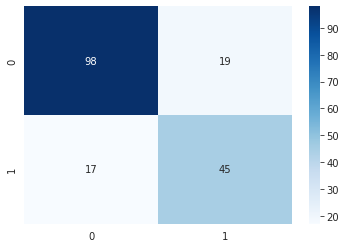

In [ ]:
sns.heatmap(confusao, annot=True, cmap="Blues")

In [139]:
passageiro_teste = {
 "Sex": 0,
 "Age": 40,
 "SibSp": 0,
 "Parch": 1,
 "FamilySize": 2,
 "Fare": 10,
 "Pclass_2": 0,
 "Pclass_3": 0,
 "Title_Miss": 0,
 "Title_Mr": 1,
 "Title_Mrs": 0,
 "Title_Person": 0,
 "Embarked_Q": 1,
 "Embarked_S": 0
}
passageiro_df = pd.DataFrame(passageiro_teste, index=[0])
resultado = ml.predict(passageiro_df)[0]

if resultado == 0:
  print("Não sobreviveu")
else:
  print("Sobreviveu")

print(resultado)

Não sobreviveu
0


### Função que processa o Algoritmo e retorna a acurácia

In [ ]:
def relatorio_ml(df, algoritmo, opt=2):
  X = df.drop("Survived", axis=1)
  y = df["Survived"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

  if opt == 0:
    ml = algoritmo(max_iter=5000)
  elif opt == 1:
    ml = algoritmo(n_estimators=5000)
  elif opt == 2:
    ml = algoritmo()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f"Acurácia treino: {score_train * 100:.2f}%")
  
  score_test = ml.score(X_test, y_test)
  print(f"Acurácia test: {score_test * 100:.2f}%")

  y_previsto = ml.predict(X_test)
  print(metrics.classification_report(y_test, y_previsto))

  confusao = confusion_matrix(y_test, y_previsto)
  sns.heatmap(confusao, annot=True, cmap="Blues")

  return score_train, score_test

### Decision Tree Classifier

Acurácia treino: 98.46%
Acurácia test: 78.21%
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       117
           1       0.68      0.71      0.69        62

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.78      0.78       179



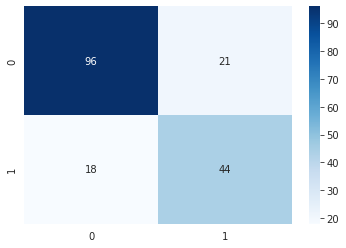

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc, DecisionTreeClassifier)

Acurácia treino: 98.60%
Acurácia test: 77.09%
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       117
           1       0.66      0.71      0.68        62

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.78      0.77      0.77       179



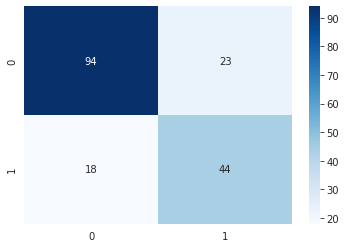

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc_full, DecisionTreeClassifier)

### Logistic Regression

Acurácia treino: 80.48%
Acurácia test: 82.12%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



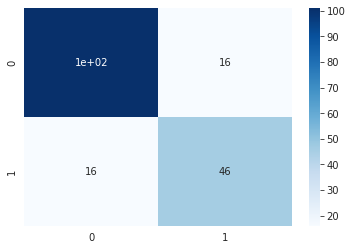

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc, LogisticRegression, opt=0)

Acurácia treino: 81.88%
Acurácia test: 85.47%
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       117
           1       0.79      0.79      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



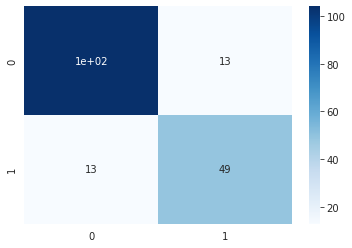

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc_full, LogisticRegression, opt=0)

### K-Nearest Neighbours

Acurácia treino: 79.78%
Acurácia test: 71.51%
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       117
           1       0.59      0.56      0.58        62

    accuracy                           0.72       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.71      0.72      0.71       179



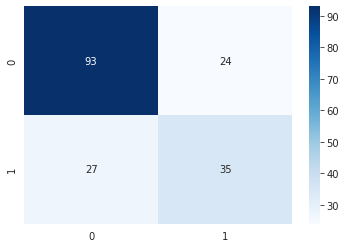

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc, KNeighborsClassifier)

Acurácia treino: 79.92%
Acurácia test: 71.51%
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       117
           1       0.60      0.55      0.57        62

    accuracy                           0.72       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.71      0.72      0.71       179



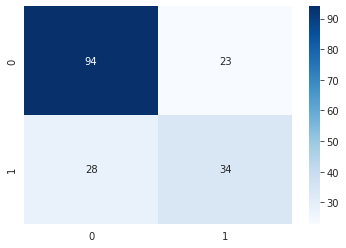

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc_full, KNeighborsClassifier)

### Random Forest

Acurácia treino: 98.46%
Acurácia test: 80.45%
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       117
           1       0.71      0.74      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.81      0.80      0.81       179



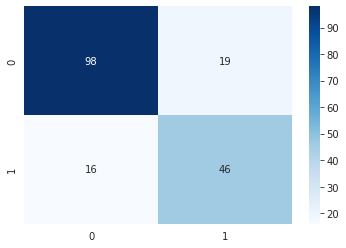

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc, RandomForestClassifier)

Acurácia treino: 98.60%
Acurácia test: 82.12%
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.73      0.76      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



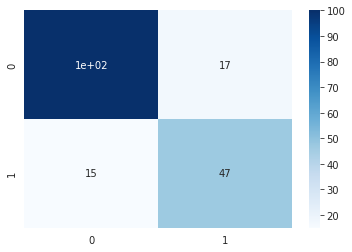

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc_full, RandomForestClassifier)

### Linear Support Vector Machines (SVC)

/opt/python37/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia treino: 81.04%
Acurácia test: 83.24%
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       117
           1       0.79      0.71      0.75        62

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



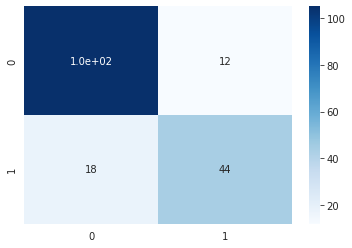

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc, LinearSVC, opt=0)

/opt/python37/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia treino: 82.30%
Acurácia test: 86.03%
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       117
           1       0.79      0.81      0.80        62

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



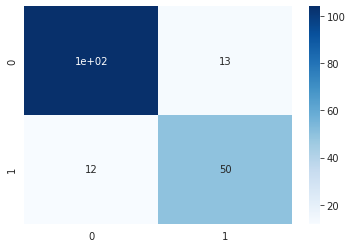

In [ ]:
log_train, log_test = relatorio_ml(df_titanic_proc_full, LinearSVC, opt=0)

# Outros Assuntos

### Criação de uma série
https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [ ]:
pessoas = ["Paulo", "Gabriel", "Julia"]
ser_pessoas1 = pd.Series(pessoas)
print(ser_pessoas1)

ser_pessoas2 = pd.Series(pessoas, index=["M", "M", "F"])
print(ser_pessoas2)

estados = {"norte": "Amazonas",
           "nordeste": "Maranhão",
           "sul": "Paraná",
           "sudeste": "Rio de Janeiro",
           "centro-oeste": "Mato Grosso"
          }

ser_estados = pd.Series(estados)
print(ser_estados)



0      Paulo
1    Gabriel
2      Julia
dtype: object
M      Paulo
M    Gabriel
F      Julia
dtype: object
norte                 Amazonas
nordeste              Maranhão
sul                     Paraná
sudeste         Rio de Janeiro
centro-oeste       Mato Grosso
dtype: object


### Criação de um dataframe
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [ ]:
notas = {"matematica": [8, 7, 6, 4, 6, 5, 8, 3, 4, 7],
             "fisica": [9, 9, 8, 3, 8, 4, 9, 2, 6, 8],
          "portugues": [7, 6, 5, 7, 7, 8, 5, 9, 7, 6],
          "literatura":[7, 8, 8, 9, 8, 9, 8, 10, 9, 8]
         }

df_notas = pd.DataFrame(notas, index=["A", "B", "C", "D", "E",
                                       "F", "G", "H", "I", "J"])   

### Explorando o DataFrame do Titanic

In [ ]:
# Exibir dados (head e tail)
# print(df_titanic.head())
# print("=" * 100)

# print(df_titanic.tail())
# print("=" * 100)

# Informação sobre o DataFrame
# print(df_titanic.shape)
# print(df_titanic.columns)
# print(df_titanic.dtypes) # Observar variaveis categóricas e quantitativas
# print(df_titanic.info()) # Observar campos nulos
# print(df_titanic.isnull().sum()) # Observar campos nulos

# print (df_titanic["Embarked"].unique()) # Dados únicos


# Seleção dos dados
# print(df_titanic[0:10][["PassengerId", "Pclass", "Sex"]])
# print(df_titanic.loc[0:5, ["Name","Age"]])  # loc é baseado no label
# print(df_titanic.loc[0:5:, "Name":"Age"])  # Usando range
# print(df_titanic.loc[0:10:2, "Name":"Age"])  # Alterando o step

# print(df_titanic.iloc[0:10, 0:3])  # iloc é baseado na posição
# print(df_titanic.iloc[0:10:2, [1, 2, 5]]) # com step


# Seleção com filtro
# print(df_titanic[df_titanic["Sex"] == "female"].loc[:, ["PassengerId", "Name", "Age"]])
# print(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Age"] <= 15)].loc[:, ["PassengerId", "Name", "Age"]])



### Preparação dos Dados (limpeza, tratamento, aumentar)

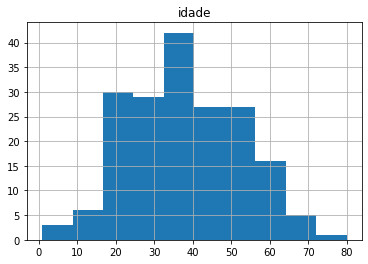

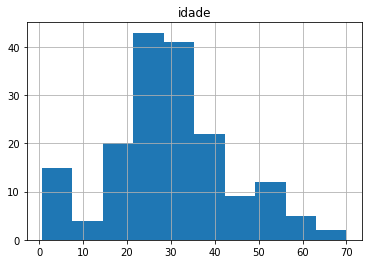

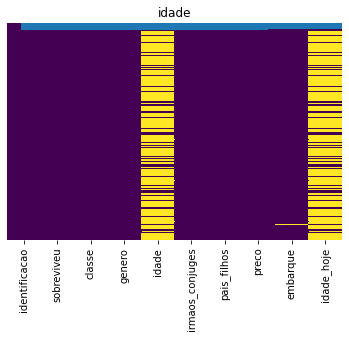

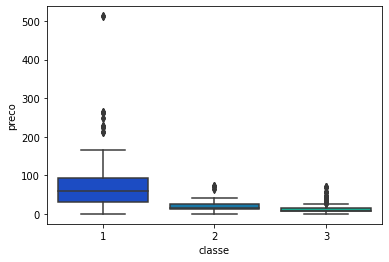

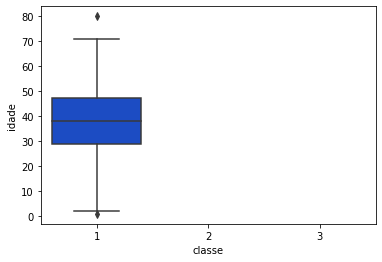

identificacao        0
sobreviveu           0
classe               0
genero               0
idade              675
irmaos_conjuges      0
pais_filhos          0
preco                0
embarque             2
idade_hoje         675
dtype: int64


In [ ]:
# Remover colunas que não serã usadas
df_titanic_proc = df_titanic.drop(["Name", "Cabin", "Ticket"], axis=1)

# Alterar o nome das variáveis/features
df_titanic_proc.columns = ["identificacao", "sobreviveu", "classe", "genero", "idade", "irmaos_conjuges", "pais_filhos", "preco", "embarque"]


# Tratar campo Substituir male => M e Female => F
df_titanic_proc.loc[df_titanic_proc["genero"] == "male", "genero"] = "M"
df_titanic_proc.loc[df_titanic_proc["genero"] == "female", "genero"] = "F"


# Definir os dados faltantes para idade em função da média de cada classe. 
# Avaliar o que usar média, mediana, quartis.

# Analisando o histograma para idade por classe
df_titanic_proc.loc[df_titanic_proc["classe"] == 1].hist(column = "idade")
df_titanic_proc.loc[df_titanic_proc["classe"] == 2].hist(column = "idade")
df_titanic_proc.loc[df_titanic_proc["classe"] == 3].hist(column = "idade")

df_titanic_proc.groupby("classe")["idade"].describe()
idade_media_classe1 = df_titanic_proc.groupby("classe")["idade"].mean().iloc[0] # Classe 1
idade_media_classe2 = df_titanic_proc.groupby("classe")["idade"].mean().iloc[1] # Classe 2
idade_media_classe3 = df_titanic_proc.groupby("classe")["idade"].mean().iloc[1] # Classe 3

# Preencher idades nulas com a média da respectiva classe
#df_titanic_proc.loc[df_titanic_proc["classe"] == 1].fillna(value=idade_media_classe1).describe()
df_titanic_proc["idade"] = df_titanic_proc.loc[df_titanic_proc["classe"] == 1]["idade"].fillna(value=idade_media_classe1)



# Criar novas colunas
df_titanic_proc["idade_hoje"] = df_titanic_proc["idade"] + (2022 - 1912)

# Organizar a ordem das colunas



sns.heatmap(df_titanic_proc.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

sns.boxplot(x = 'classe', y = 'preco', data = df_titanic_proc, palette='winter')
plt.show()

sns.boxplot(x = 'classe', y = 'idade', data = df_titanic_proc, palette='winter')
plt.show()


print(df_titanic_proc.isnull().sum())

In [ ]:
df_titanic_proc["classe1_idade_nova"] = df_titanic_proc.loc[df_titanic_proc["classe"] == 1]["idade"].fillna(value=idade_media_classe1)

In [ ]:
df_titanic_proc.loc[df_titanic_proc["classe"] == 3].loc[df_titanic_proc["idade"].isnull()]

,identificacao,sobreviveu,classe,genero,idade,irmaos_conjuges,pais_filhos,preco,embarque,idade_hoje
0,1,0,3,M,NaN,1,0,7.2500,S,NaN
2,3,1,3,F,NaN,0,0,7.9250,S,NaN
4,5,0,3,M,NaN,0,0,8.0500,S,NaN
5,6,0,3,M,NaN,0,0,8.4583,Q,NaN
7,8,0,3,M,NaN,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,F,NaN,0,0,10.5167,S,NaN
884,885,0,3,M,NaN,0,0,7.0500,S,NaN
885,886,0,3,F,NaN,0,5,29.1250,Q,NaN
888,889,0,3,F,NaN,1,2,23.4500,S,NaN


In [ ]:
df_titanic_proc.loc[df_titanic_proc["classe"] == 1].fillna(value=idade_media_classe1).describe

,identificacao,sobreviveu,classe,idade,irmaos_conjuges,pais_filhos,preco,idade_hoje
count,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,132.955663
std,246.737616,0.484026,0.0,13.731315,0.611898,0.693997,78.380373,40.526843
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,38.233441
25%,270.750000,0.000000,1.0,29.000000,0.000000,0.000000,30.923950,131.750000
50%,472.000000,1.000000,1.0,38.233441,0.000000,0.000000,60.287500,145.000000
75%,670.500000,1.000000,1.0,47.250000,1.000000,0.000000,93.500000,157.250000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,190.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf183d8f90>]],
      dtype=object)

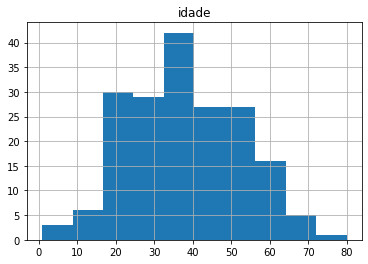

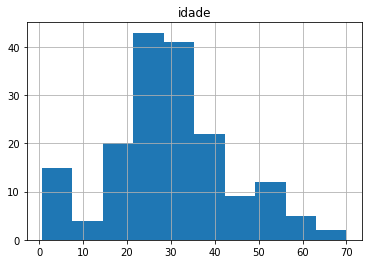

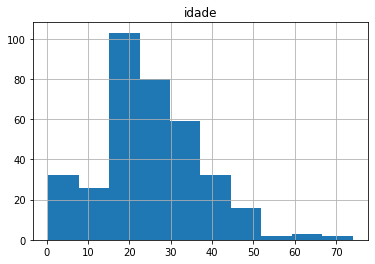

In [ ]:
df_titanic_proc.loc[df_titanic_proc["classe"] == 1].hist(column = "idade")
df_titanic_proc.loc[df_titanic_proc["classe"] == 2].hist(column = "idade")
df_titanic_proc.loc[df_titanic_proc["classe"] == 3].hist(column = "idade")
                    

### Computando algumas estatísticas descritivas
Média, mediana, moda, desvio padrão

0     2.0
1     3.0
2     6.0
3     7.0
4     7.0
5     8.0
6     9.0
7     9.5
8    10.0
dtype: float64
Média: 6.833333333333333
Mediana: 7.0
Moda: 7.0
Variância: 7.750000000000001
Desvio Padrão: 2.783882181415011
Desvio absoluto: 2.1111111111111116
Mín: 2.0
Max: 10.0
Amplitude: 8.0
count     9.000000
mean      6.833333
std       2.783882
min       2.000000
25%       6.000000
50%       7.000000
75%       9.000000
max      10.000000
dtype: float64
Primeiro quartil: 6.0
Segundo quartil: 7.0
Terceiro quartil: 9.0


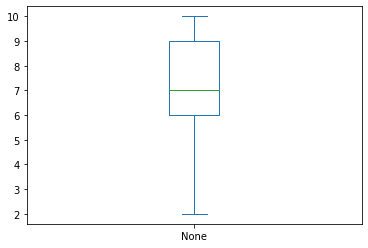

In [ ]:
notas = [10, 8, 9.5, 3, 2, 7, 9, 6, 7]
ser_notas = pd.Series(notas)
print(ser_notas.sort_values(ascending=True).reset_index(drop=True))
print("="*40)
print("Média:", ser_notas.mean())
print("Mediana:", ser_notas.median())
print("Moda:",ser_notas.mode()[0])
print("Variância:", ser_notas.var())
print("Desvio Padrão:", ser_notas.std())
print("Desvio absoluto:", ser_notas.mad())
print("Mín:", ser_notas.min())
print("Max:", ser_notas.max())
print("Amplitude:", ser_notas.max() - ser_notas.min())
print("="*40)
print(ser_notas.describe())
############################################################
print("="*40)
# Primeiro quartil
print("Primeiro quartil:", ser_notas.quantile(q=0.25))

# Segundo quartil
print("Segundo quartil:", ser_notas.quantile(q=0.50))

# Terceiro Quartil
print("Terceiro quartil:", ser_notas.quantile(q=0.75))

############################################################
print("="*40)
# Diagrama de caixa (Box-Plot)
ser_notas.plot(kind="box")


### Correlação e covariância
 



Matriz de Correlação
            matematica    fisica  portugues  literatura
matematica    1.000000  0.906079  -0.689406   -0.917942
fisica        0.906079  1.000000  -0.769902   -0.906327
portugues    -0.689406 -0.769902   1.000000    0.652668
literatura   -0.917942 -0.906327   0.652668    1.000000
Matriz de Covariância
            matematica    fisica  portugues  literatura
matematica    3.066667  4.244444  -1.511111   -1.355556
fisica        4.244444  7.155556  -2.577778   -2.044444
portugues    -1.511111 -2.577778   1.566667    0.688889
literatura   -1.355556 -2.044444   0.688889    0.711111


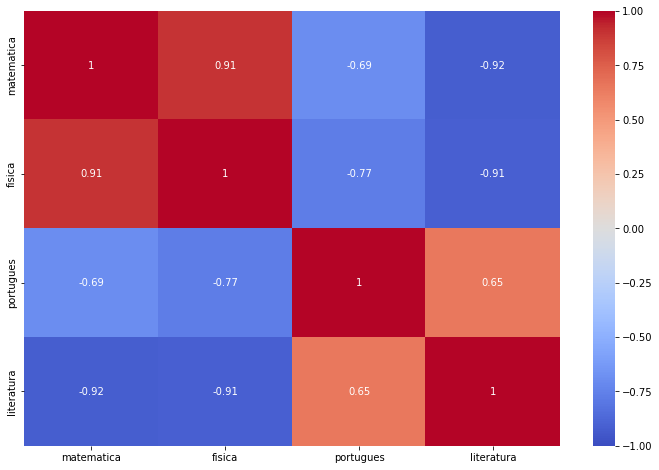

In [ ]:
notas = {"matematica": [8, 7, 6, 4, 6, 5, 8, 3, 4, 7],
             "fisica": [9, 9, 8, 3, 8, 4, 9, 2, 6, 8],
          "portugues": [7, 6, 5, 7, 7, 8, 5, 9, 7, 6],
          "literatura":[7, 8, 8, 9, 8, 9, 8, 10, 9, 8]
         }

df_notas = pd.DataFrame(notas, index=["A", "B", "C", "D", "E",
                                       "F", "G", "H", "I", "J"])     

print("Matriz de Correlação")
print(df_notas.corr())
print("="*60)
print("Matriz de Covariância")
print(df_notas.cov())

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_notas.corr(), 
            xticklabels=df_notas.columns.values,
            yticklabels=df_notas.columns.values, 
            cmap="coolwarm", 
            vmin=-1, vmax=1, 
            annot=True)